In [55]:
# Import modules
import pandas as pd

In [56]:
# Open the file containing the dataset.
datei = pd.read_csv("/home/andre/Desktop/dataset.csv")

In [57]:
datei.shape

(132, 17)

In [58]:
datei.head()

,date,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov,open,high,low,close,adjclose,volume,ticker
0,2011-01-01,Uptrend,0.83,10.943548,"132,66","106,1","163,71","1,67411428571429",1525.61,66575,9.264964,9.492898,7.756332,7.936712,6.187788,149128856,LREN3.SA
1,2011-02-01,Uptrend,0.80,11.250000,"136,18","111,4","166,17","1,66719",1533.05,67383,8.033461,8.736943,7.756332,8.363064,6.520191,120569757,LREN3.SA
2,2011-03-01,Uptrend,0.79,11.717742,"144,93","105,3","162,43","1,6583",1629.59,68587,8.364704,9.059987,8.140049,8.672990,6.761821,106565665,LREN3.SA
3,2011-04-01,Uptrend,0.77,11.800000,"139,89","108,5","163,01","1,58564736842105",1672.59,66133,8.672990,9.660159,8.625435,9.519135,7.440604,87893355,LREN3.SA
4,2011-05-01,Uptrend,0.47,12.000000,"143,23","106,4","155,6","1,61269090909091",1636.41,64620,9.512576,9.819222,8.896005,9.814302,7.843419,108838470,LREN3.SA


In [59]:
datei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         132 non-null    object 
 1   trend        132 non-null    object 
 2   ipca         132 non-null    float64
 3   selic        132 non-null    float64
 4   IBC-Br       132 non-null    object 
 5   icom         132 non-null    object 
 6   expectativa  132 non-null    object 
 7   dolar        132 non-null    object 
 8   icon         132 non-null    float64
 9   ibov         132 non-null    int64  
 10  open         132 non-null    float64
 11  high         132 non-null    float64
 12  low          132 non-null    float64
 13  close        132 non-null    float64
 14  adjclose     132 non-null    float64
 15  volume       132 non-null    int64  
 16  ticker       132 non-null    object 
dtypes: float64(8), int64(2), object(7)
memory usage: 17.7+ KB


In [60]:
datei.describe()

,ipca,selic,icon,ibov,open,high,low,close,adjclose,volume
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02
mean,0.494015,8.861671,3152.596364,72257.000000,23.220766,25.028803,21.541370,23.326701,21.289157,1.123960e+08
std,0.349057,3.652107,1090.243310,23045.457373,13.500074,14.484806,12.398052,13.420894,13.123618,5.040229e+07
min,-0.380000,2.000000,1498.440000,40406.000000,7.938352,8.736943,7.192235,7.936712,6.187788,1.766306e+07
25%,0.250000,6.500000,2391.112500,54221.000000,11.106888,12.222783,10.737519,11.214296,9.704381,8.081030e+07
50%,0.450000,8.705645,2854.810000,63791.500000,18.406941,19.533496,17.226274,18.763602,16.814088,9.810343e+07
75%,0.742500,11.801613,3812.875000,90616.000000,34.152985,36.457018,30.689229,33.970031,31.415106,1.264414e+08
max,1.350000,14.250000,5497.850000,126802.000000,56.995518,60.418224,55.725643,56.995518,53.631706,2.767085e+08


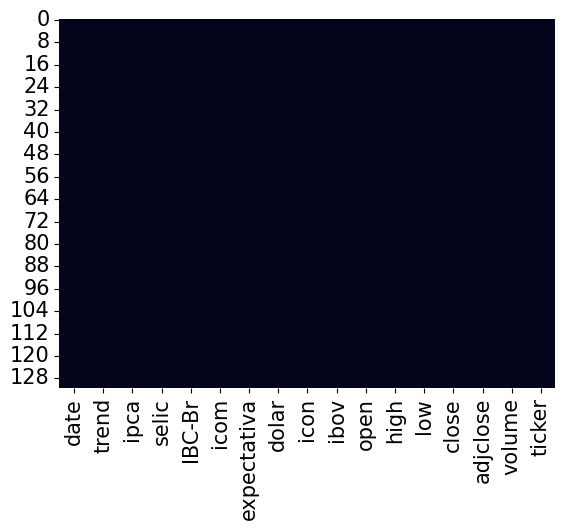

In [61]:
# Checks for the presence of null values in the dataframe
import seaborn as sns
sns.heatmap(datei.isnull(), cbar = False); # isnull() returns null values.

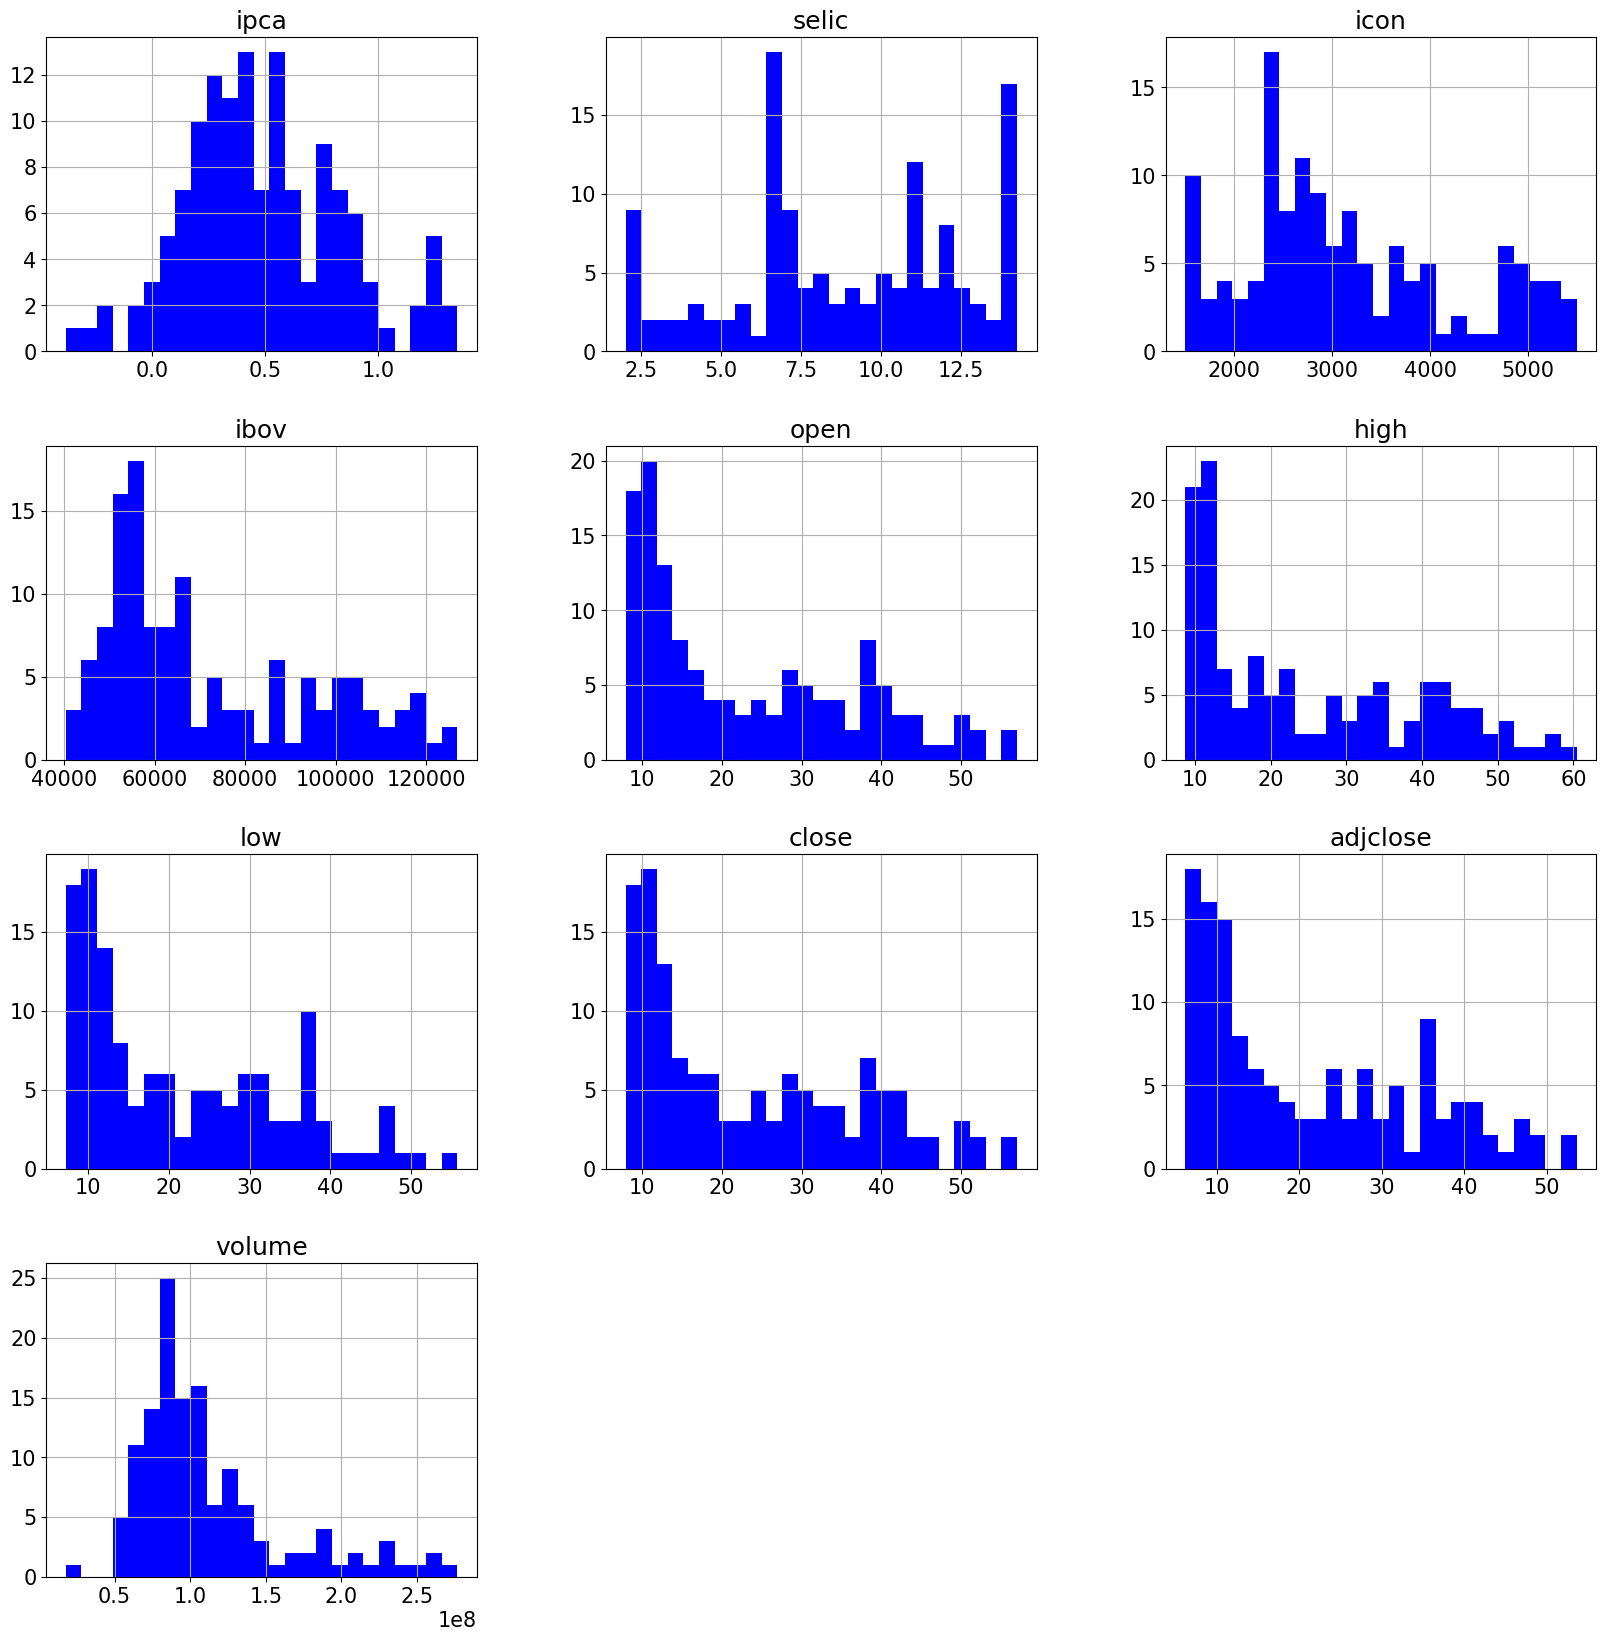

In [62]:
datei.hist(bins = 25, figsize=(20,20), color = 'b');

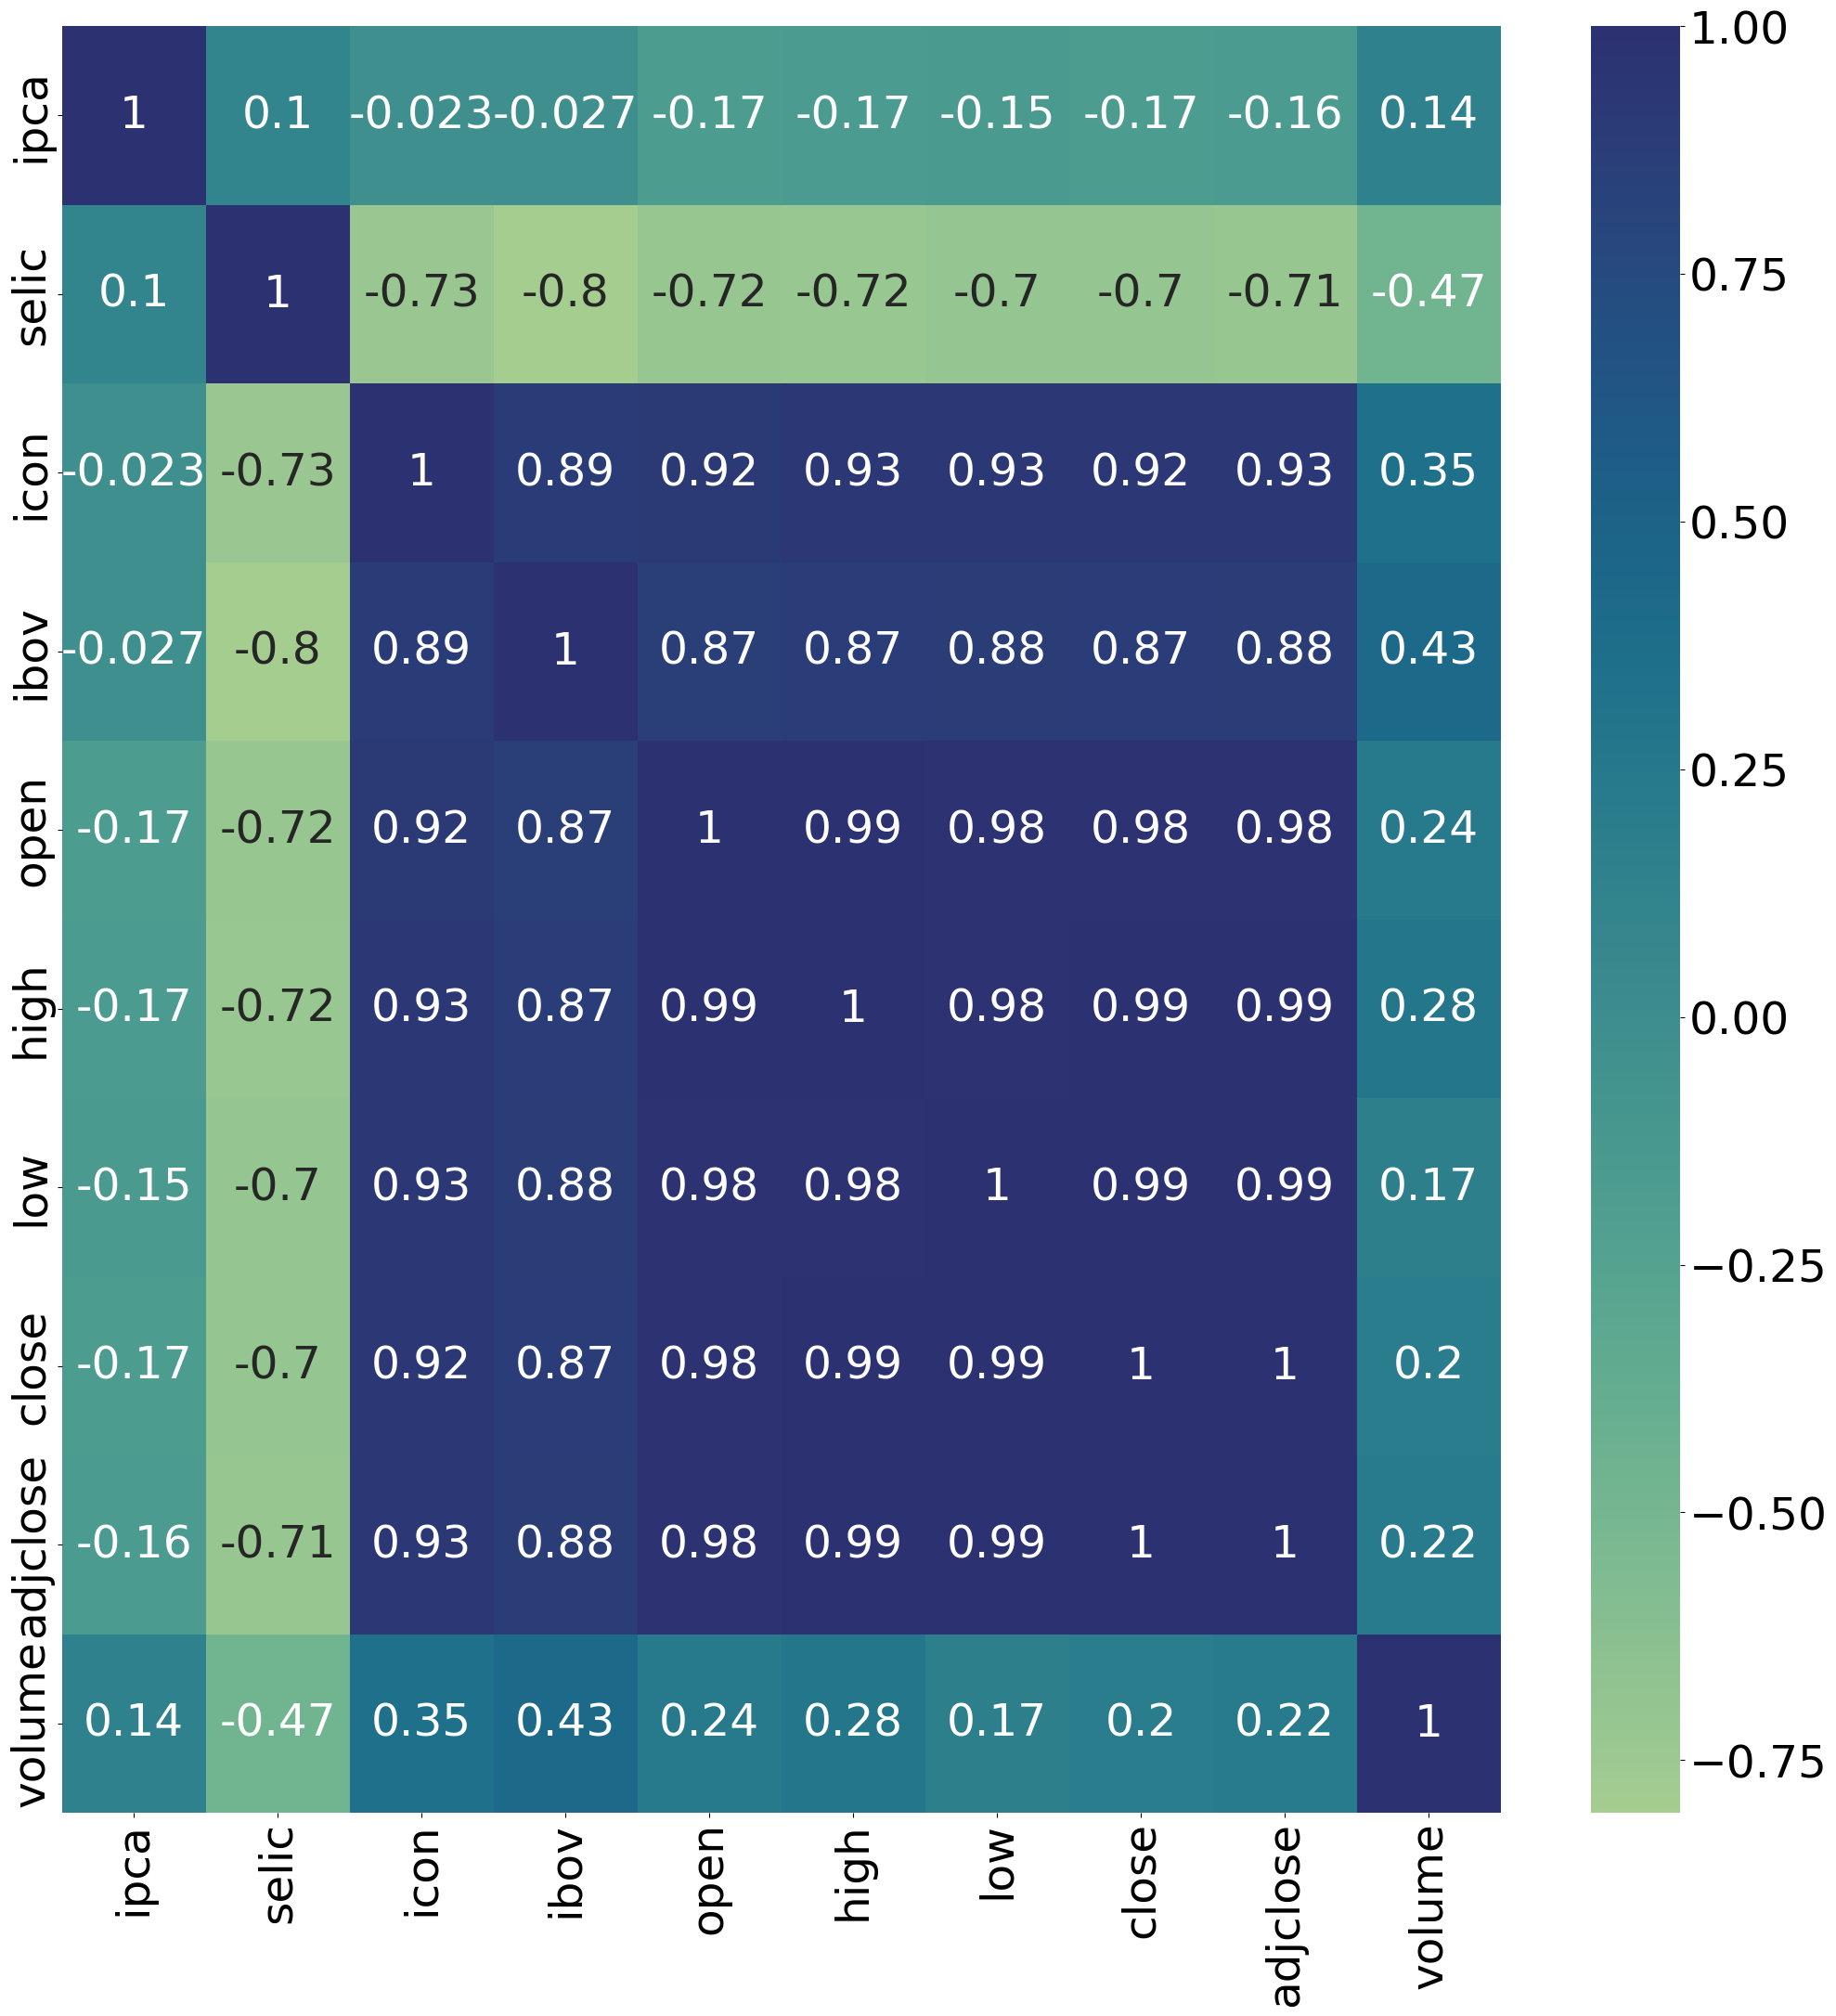

In [63]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 35})
correlations = datei.corr()
f, ax = plt.subplots(figsize = (25,25))
sns.heatmap(correlations, annot=True, cmap="crest");
# heatmap() Plot rectangular data as a color-encoded matrix.

In [64]:
# Replace the periods by comma. 
datei['IBC-Br'] = [float(str(i).replace(",", ".")) for i in datei['IBC-Br']]
datei['icom'] = [float(str(i).replace(",", ".")) for i in datei['icom']]
datei['dolar'] = datei['dolar'].str.replace(',','.')
datei['expectativa'] = datei['expectativa'].str.replace(',','.')

In [65]:
# Remove the columns do not needed.
new_data_set = datei.drop(columns=['date', 'open', 'high', 'low', 'close', 'adjclose', 'volume', 'ticker'], axis = 1)

In [66]:
# converting object type column to float.
datei['dolar'] = datei['dolar'].astype(float)
datei['expectativa'] = datei['expectativa'].astype(float) 

In [67]:
# Show the first five registers from dataframe.
new_data_set.head()

,trend,ipca,selic,IBC-Br,icom,expectativa,dolar,icon,ibov
0,Uptrend,0.83,10.943548,132.66,106.1,163.71,1.67411428571429,1525.61,66575
1,Uptrend,0.80,11.250000,136.18,111.4,166.17,1.66719,1533.05,67383
2,Uptrend,0.79,11.717742,144.93,105.3,162.43,1.6583,1629.59,68587
3,Uptrend,0.77,11.800000,139.89,108.5,163.01,1.58564736842105,1672.59,66133
4,Uptrend,0.47,12.000000,143.23,106.4,155.6,1.61269090909091,1636.41,64620


In [68]:
# Normalize labels. to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()  
y = labelencoder.fit_transform(new_data_set['trend'])
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [69]:
# Select the macroeconomic indicators.
previsores = new_data_set.drop(['trend', 'ipca', 'expectativa', 'icom', 'IBC-Br', 'selic'], axis = 1)
X = previsores.iloc[:,0:132].values
previsores

,dolar,icon,ibov
0,1.67411428571429,1525.61,66575
1,1.66719,1533.05,67383
2,1.6583,1629.59,68587
3,1.58564736842105,1672.59,66133
4,1.61269090909091,1636.41,64620
...,...,...,...
127,5.25112272727273,5007.44,118781
128,5.27909047619048,4709.56,110979
129,5.539375,4251.43,103501
130,5.55626,3932.70,101915


In [70]:
# Transform features by scaling each feature to a given range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [71]:
# Extracting a value from predictors
d = X[0] 
d

array([0.02715036, 0.0067935 , 0.30289597])

In [72]:
# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

X_train.shape, y_train

((99, 3),
 array([0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]))

In [73]:
# Show the matrix shape and the y data for test. 
X_test.shape, y_test

((33, 3),
 array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]))

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
y_pred = forest.predict(X_test)

In [77]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [78]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

print("Accuracy .: ", accuracy_score(y_test, y_pred))  # Accuracy classification score.

print("Precision : ", precision_score(y_test, y_pred))

print("Recall ...: ", recall_score(y_test, y_pred))

print("F1 Score .: ", f1_score(y_test, y_pred, average='macro'))

Accuracy .:  0.7272727272727273
Precision :  0.9047619047619048
Recall ...:  0.7307692307692307
F1 Score .:  0.6674132138857782


In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred, y_test)
cm

array([[ 5,  7],
       [ 2, 19]])

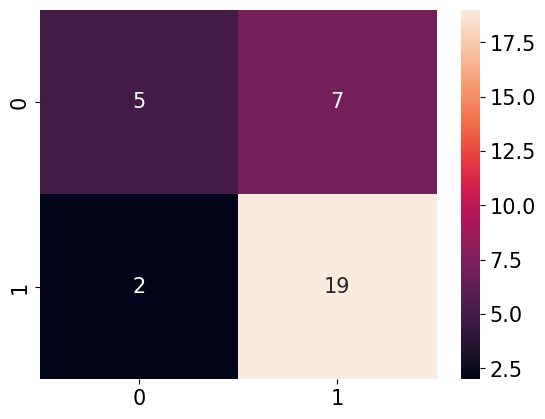

In [80]:
plt.rcParams.update({'font.size': 15})
sns.heatmap(cm, annot=True);

In [81]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.42      0.71      0.53         7
           1       0.90      0.73      0.81        26

    accuracy                           0.73        33
   macro avg       0.66      0.72      0.67        33
weighted avg       0.80      0.73      0.75        33



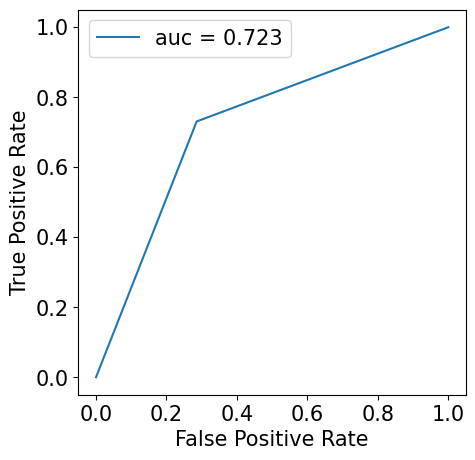

In [82]:
# Plotting ROC and AUC
from sklearn.metrics import roc_curve, auc

svm_fp, svm_tp, threshold = roc_curve(y_test, y_pred)
auc_svm = auc(svm_fp, svm_tp)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(svm_fp, svm_tp, label='auc = %0.3f' % auc_svm)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()